In [3]:
# Import required libraries
import pandas as pd

In [4]:
# Read data from csv file into dataframe
data_df = pd.read_csv('titanic-data.csv')

In [40]:
# Passenger class of people who survived
survived = data_df[data_df.Survived == 1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [41]:
# Number of survivors in each passenger class
survivor_count_per_class = survived.groupby('Pclass').size()
survivor_count_per_class

Pclass
1    136
2     87
3    119
dtype: int64

More survivors in class 1. The least number of survivors in class 2

In [7]:
# Total number of passengers in each class
data_df.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

In [8]:
# Percentage of survivors in each class
percentage_survivors_classwise = data_df[['PassengerId']].apply(lambda x: 100 * data_df[data_df.Survived == 1].groupby(['Pclass']).size()/data_df.groupby(['Pclass']).size())
percentage_survivors_classwise

,PassengerId
Pclass,
1,62.962963
2,47.282609
3,24.236253


The percentage of survivors is decreasing from higher class to lower class

In [9]:
# Number of people survived based on gender
survivor_count_genderwise = data_df[data_df.Survived == 1].groupby('Sex').size()
survivor_count_genderwise

Sex
female    233
male      109
dtype: int64

In [10]:
# Total number of females and males
total_count_genderwise = data_df.groupby('Sex').size() 
total_count_genderwise

Sex
female    314
male      577
dtype: int64

In [11]:
# Percentage of people survived based on gender
percentage_survived_genderwise = data_df[['Sex']].apply(
    lambda x: 100 * data_df[data_df.Survived == 1].groupby('Sex').size()/data_df.groupby('Sex').size())
percentage_survived_genderwise

,Sex
Sex,
female,74.203822
male,18.890815


A majority of the females survived. Only a minority of the men survived

In [12]:
# Count of survivors of different age group

In [13]:
survived_series_age = data_df['Age'][data_df.Survived == 1]
survivors_age_groupwise = data_df[data_df.Survived == 1].groupby(pd.cut(survived_series_age, 
                                            bins=pd.IntervalIndex.from_tuples([(1,12), (12, 30), (30, 80)]))).size()
survivors_age_groupwise

Age
(1, 12]      28
(12, 30]    126
(30, 80]    124
dtype: int64

In [14]:
# Total number of passengers based on age group
total_age_groupwise = data_df.groupby(pd.cut(data_df['Age'], 
                        bins=pd.IntervalIndex.from_tuples([(1,12), (12, 30), (30, 80)]))).size()
total_age_groupwise

Age
(1, 12]      55
(12, 30]    340
(30, 80]    305
dtype: int64

In [15]:
# Percentage of survivors in each age group
percentage_survivors_age_groupwise = 100 * survivors_age_groupwise/total_age_groupwise
percentage_survivors_age_groupwise

Age
(1, 12]     50.909091
(12, 30]    37.058824
(30, 80]    40.655738
dtype: float64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sb

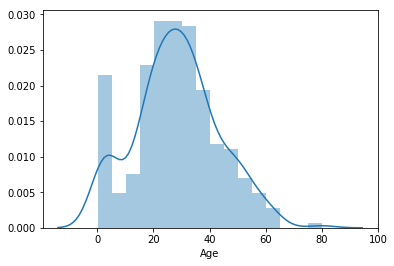

In [48]:
sb.distplot(survived['Age'].dropna())# dropna for removing NaN

Most of the survivors are of age 20 to 40

In [49]:
survived['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

This means 75% of the survivors are below 36 years of age. 50% of the survivors are bet